In [1]:
!pip install tensorflow_datasets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.VA6JDR_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [4]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

In [5]:
# info

In [6]:
for i, example in enumerate(dataset['train']):
  # example = (image, label)
  image, label = example
  save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)

  filename = save_dir + "/" + "{}_{}.jpg".format(class_names[label], i)
  tf.keras.preprocessing.image.save_img(filename, image.numpy())
  # print(filename)
  # break

- CNN Building Blocks
    - Input Layer
    - Convolutional Layer
    - Pooling Layer
    - Dropout Layer
    - Batch Normalization Layer
    - Activation Layer
    - Fully Connected Layer
    - Flatten Layer
    - Output Layer
    

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [8]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10,
                              width_shift_range=0.1, height_shift_range=0.1,
                             shear_range=0.1, zoom_range=0.10, horizontal_flip=True)

train_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150, 150),
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150, 150),
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# 1st layer CNN
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 2nd layer CNN
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 3rd layer CNN
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,073 (72.61 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 162s 260ms/step - accuracy: 0.6054 - loss: 2.8690 - val_accuracy: 0.6869 - val_loss: 0.5789
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 144s 248ms/step - accuracy: 0.7224 - loss: 0.5545 - val_accuracy: 0.7523 - val_loss: 0.5005
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 144s 247ms/step - accuracy: 0.7483 - loss: 0.5136 - val_accuracy: 0.7721 - val_loss: 0.4701
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 156s 268ms/step - accuracy: 0.7726 - loss: 0.4794 - val_accuracy: 0.7648 - val_loss: 0.4769
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 143s 246ms/step - accuracy: 0.7898 - loss: 0.4536 - val_accuracy: 0.8054 - val_loss: 0.4410
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 143s 245ms/step - accuracy: 0.7977 - loss: 0.4373 - val_accuracy: 0.8020 - val_loss: 0.4345
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 143s 245ms/step - accuracy: 0.8022 - loss: 0.4261 - val_accuracy: 0.7779 - val_loss: 0.4885
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 156s 268ms/step - accuracy: 0.8189 -

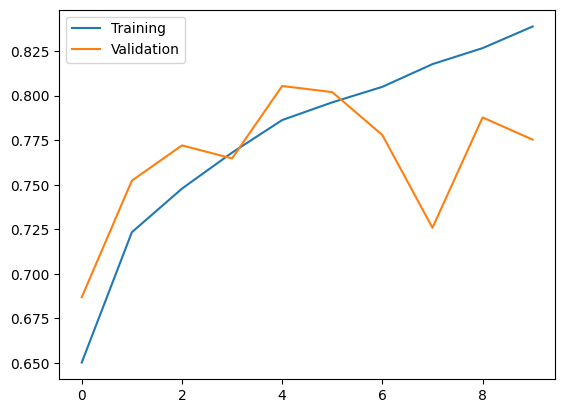

In [13]:
history.history

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(['Training', 'Validation'])


In [14]:
# save model
model.save('cats_vs_dogs.h5')

In [15]:
model_load = tf.keras.models.load_model('cats_vs_dogs.h5')

In [16]:
from PIL import Image
import numpy as np
import requests
from tensorflow.keras.preprocessing import image
import cv2
# Hàm làm nét ảnh
def sharpen_image(pil_image):
    img_cv = np.array(pil_image)
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(img_cv, -1, kernel)
    sharpened = cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)
    return Image.fromarray(sharpened)

def predict_image(model, img_source, target_size=(150, 150)):
    """
    Dự đoán ảnh từ URL hoặc file local.
    - img_source: URL hoặc đường dẫn file ảnh local.
    - model: mô hình đã huấn luyện.
    """

    if img_source.startswith('http://') or img_source.startswith('https://'):
        img = Image.open(requests.get(img_source, stream=True).raw).resize(target_size)
    else:
        img = Image.open(img_source).resize(target_size)

    # Làm nét ảnh trước khi chuyển sang array
    img = sharpen_image(img)

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    THRESHOLD = 0.5
    label_index = int(prediction[0][0] > THRESHOLD)
    class_name = {v: k for k, v in train_generator.class_indices.items()}[label_index]

    return class_name

In [17]:
# Dự đoán từ URL
url_img = "https://i.redd.it/chdijwuj7ah21.jpg"
print("Dự đoán từ URL:", predict_image(model_load, url_img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step
Dự đoán từ URL: cat


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Dự đoán từ file local
local_img_path = "/content/Dog_Breeds.jpg"
print("Dự đoán từ local:", predict_image(model_load, local_img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Dự đoán từ local: dog


In [23]:
!pip install gradio

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f65f68489d246cc0f2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [24]:
import gradio as gr
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load model
model = load_model("cats_vs_dogs.h5")

# Hàm dự đoán và hiển thị ảnh
def predict_image(uploaded_img, image_url):
    try:
        if image_url:  # Nếu nhập URL
            response = requests.get(image_url)
            img = Image.open(BytesIO(response.content)).convert("RGB")
        elif uploaded_img:  # Nếu upload ảnh
            img = uploaded_img
        else:
            return "Vui lòng tải ảnh lên hoặc nhập link!", None

        # Tiền xử lý ảnh
        resized = img.resize((150, 150))
        img_array = img_to_array(resized) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Dự đoán
        prediction = model.predict(img_array)[0][0]
        label = "Dog 🐶" if prediction > 0.5 else "Cat 🐱"

        return label, img  # Trả về cả nhãn và ảnh để hiển thị
    except Exception as e:
        return f"Đã xảy ra lỗi: {str(e)}", None

# Giao diện
gr.Interface(
    fn=predict_image,
    inputs=[
        gr.Image(type="pil", label="Upload ảnh (tuỳ chọn)"),
        gr.Textbox(label="Hoặc nhập link ảnh")
    ],
    outputs=[
        gr.Label(label="Dự đoán"),
        gr.Image(label="Ảnh đã chọn")
    ],
    title="🐾 Cat vs Dog Classifier",
    description="Tải ảnh lên hoặc dán link ảnh từ internet để phân loại mèo hay chó."
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0176ef05a893146592.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
